# Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow, 2nd Edition

## by Aurelien Geron

### Notes by Melis Tekant

## Chapter 6: Decision Trees

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns

Decision Trees, the basic component of Random Forests, are a powerful ML algorithm that can be used for both regression and classification and can perform multioutput tasks. This chapter will use CART training algorithm from Scikit-Learn (binary trees).

In [60]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
#Select petal length and width
X = iris.data[:,2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y);

In [8]:
#The decision tree can be visualized via export_graphviz()

# from sklearn.tree import export_graphviz

# export_graphviz(tree_clf,out_file = image_path('iris_tree.dot'),
#                feature_names = iris.feature_names[2:],
#                class_names = iris.target_names, rounded = True, filled = True)

Decision Trees do not require feature scaling or centering.

Gini impurity:

$$ G_i = 1 - \Sigma_{k=1}^n p_{i,k}^2 $$

where $p_{i,k}$ is the ratio of instances in class k to all training instances in the i'th node.

A node is pure if all training instances belong to the same class (gini = 0).

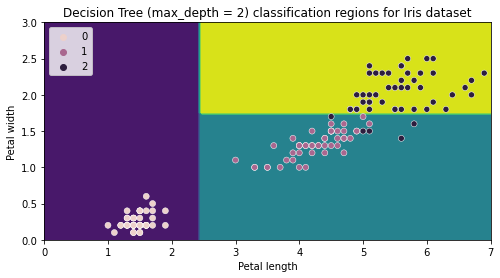

In [89]:
xs = np.linspace(0, 7, 100)
ys = np.linspace(0, 3, 100)

petlen,petwid = np.meshgrid(xs,ys)

flr_cl = tree_clf.predict(np.array(np.meshgrid(xs,ys)).T.reshape(-1,2))

plt.figure(figsize = (8,4))
plt.contourf(petlen,petwid,flr_cl.reshape(100,100).T)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Decision Tree (max_depth = 2) classification regions for Iris dataset');


Decision trees can also estimate probabilities of instances belonging to classes.

In [98]:
tree_clf.predict_proba([[2.5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [99]:
tree_clf.predict([[2.5,1.5]])

array([1])

The CART (classification and regression tree) algorithm:

This algorithm 'grows' trees via minimizing the cost function:

$$ J(k,t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}, $$

where $G$ denotes the impurity of the subset and $m$ the number of instances in that subset.

The algorithm splits the training set into two piles with this cost function until max_depth (or some other parameter) is reached. 

This is a greedy algorithm, so it searches for the optimum split at each level separately, not as a whole. As such, it may not produce the best solution. Decision trees scale as $ O(\log_2(m))$, but the globally optimum is an $O(\exp(m))$ problem, which makes it intractable for most datasets to perform. Nevertheless, decision trees usually yield reasonably good solutions.

Instead of Gini, entropy can be used to measure impurity. 

$$ H_i = - \Sigma_{k = 1, p_{i,k} \neq 0}^n p_{i,k} \log_2(P_{i,k}) $$

Gini impurity is slightly faster to compute, so may be more desired, but entropy leads to more balanced trees in the case that there's a large frequent class. 

Regularization:

If Decision Trees are left unconstrained, they will likely overfit the model (nonparametric model), so they need to be restricted (regularized). One parameter is the maximum allowed depth (max_depth). Others are the minimum sample a node must have to split (min_samples_split or min_weight_fraction_leaf), maximum number of leaf nodes (max_leaf_nodes), or the maximum number of evaluated features at each split (max_features). Decision trees can also be 'pruned' by deleting nodes that do not provide a statistically significant improvement on purity. 

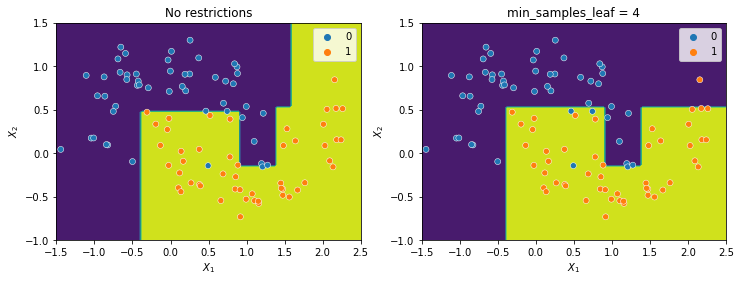

In [138]:
from sklearn.datasets import make_moons

X , y = make_moons(100,noise=0.25)

tree_reg = DecisionTreeClassifier(min_samples_leaf = 4)
tree_reg.fit(X,y)
tree_unreg = DecisionTreeClassifier()
tree_unreg.fit(X,y)

xs = np.linspace(-1.5, 2.5, 100)
ys = np.linspace(-1, 1.5, 100)

x1,x2 = np.meshgrid(xs,ys)

unreg_preds = tree_unreg.predict(np.array(np.meshgrid(xs,ys)).T.reshape(-1,2))
reg_preds = tree_reg.predict(np.array(np.meshgrid(xs,ys)).T.reshape(-1,2))

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.contourf(x1,x2,unreg_preds.reshape(100,100).T)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('No restrictions')

plt.subplot(1,2,2)
plt.contourf(x1,x2,reg_preds.reshape(100,100).T)
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('min_samples_leaf = 4');


### Regression using Decision Trees

Decision Trees can be used for regression as well. Instead of maximizing impurity in the classification case, decision tree regressors split the training set such that it minimizes the mean squared error.

The cost function to minimize is:


$$ J(k,t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}, $$

Applying this to a noisy quadratic function:

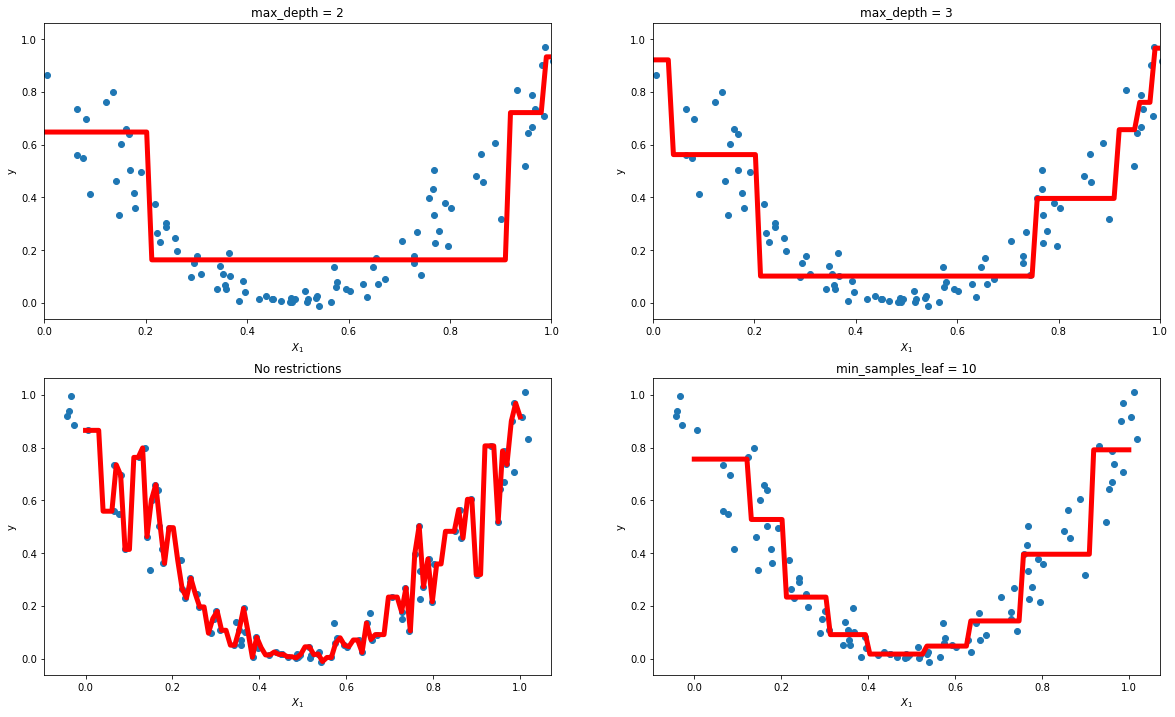

In [182]:
from sklearn.tree import DecisionTreeRegressor

X = np.linspace(0,1,100)
y = 4*(X-0.5)**2 + np.random.normal(0,0.01,100)
X = X + np.random.normal(0,0.05,100)
xgrid = np.linspace(0,1,100)

plt.figure(figsize=(20,12))

#Regularized by setting max_depth

for i in range(2,4):
    
    plt.subplot(2,2,i-1)
    plt.scatter(X,y)
    plt.title('max_depth = '+ str(i))
    plt.xlabel('$X_1$')
    plt.ylabel('y')
    
    tree_reg = DecisionTreeRegressor(max_depth = i)
    tree_reg.fit(X.reshape(-1,1),y.reshape(-1,1))
    ypreds = tree_reg.predict(xgrid.reshape(-1,1))
    plt.plot(xgrid,ypreds,'r',linewidth=5)
    
    plt.xlim([0,1])
    
#Unregularized
    
plt.subplot(2,2,3)
plt.scatter(X,y)
plt.title('No restrictions')
plt.xlabel('$X_1$')
plt.ylabel('y')
    
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X.reshape(-1,1),y.reshape(-1,1))
ypreds = tree_reg.predict(xgrid.reshape(-1,1))
plt.plot(xgrid,ypreds,'r',linewidth=5)

#Regularized by setting min_samples_leaf

plt.subplot(2,2,4)
plt.scatter(X,y)
plt.title('min_samples_leaf = 10')
plt.xlabel('$X_1$')
plt.ylabel('y')
    
tree_reg = DecisionTreeRegressor(min_samples_leaf = 10)
tree_reg.fit(X.reshape(-1,1),y.reshape(-1,1))
ypreds = tree_reg.predict(xgrid.reshape(-1,1))
plt.plot(xgrid,ypreds,'r',linewidth=5);

Instability of Decision Trees:

- Decision Trees are highly sensitive to the orientation of data. A simple rotation of the data may result in vastly different splits, which may perform better/worse. To alleviate this, reorient dataset using PCA, and then apply Decision Tree classification/regression.

- Since Decision Trees do not make any underlying assumptions about the data, they are highly sensitive to any variation in the training data. If different training sets are used, the results may differ vastly. To overcome this weakness, use Random Forests (covered in the next chapter), in which the results are averaged over many trees, leading to more robust results. 